In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [74]:
data=pd.read_csv("glass.csv")

In [75]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [76]:
data['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [78]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [79]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [80]:
data.duplicated().sum()

1

In [81]:
data.drop_duplicates(inplace=True)

In [82]:
data.duplicated().sum()

0

In [83]:
X= data.drop('Type',axis=1)

In [84]:
y= data['Type']

In [85]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2,random_state=42)

wherever we have a distance in the algorithm will use the scaling

to scale the data into same scale this scaling is required

In [86]:
# scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X_train

array([[0.20939421, 0.32030075, 0.78396437, ..., 0.20961538, 0.        ,
        0.        ],
       [0.48112379, 0.52030075, 0.84187082, ..., 0.32211538, 0.        ,
        0.7254902 ],
       [0.67998244, 0.07518797, 0.        , ..., 0.85480769, 0.        ,
        0.        ],
       ...,
       [0.20851624, 0.37744361, 0.74387528, ..., 0.23365385, 0.        ,
        0.        ],
       [0.08077261, 0.5518797 , 0.38752784, ..., 0.17307692, 0.        ,
        0.        ],
       [0.70676032, 0.46165414, 0.70155902, ..., 0.5625    , 0.        ,
        0.        ]])

In [88]:

X_test

array([[ 0.2809482 ,  0.34135338,  0.80178174,  0.33333333,  0.56785714,
         0.33928571,  0.25096154,  0.        ,  0.21568627],
       [ 0.18261633,  0.54887218,  0.        ,  0.73831776,  0.5875    ,
         0.02380952,  0.31634615,  0.2031746 ,  0.        ],
       [ 0.45522388,  0.34887218,  0.81291759,  0.18068536,  0.44821429,
         0.11309524,  0.39038462,  0.        ,  0.33333333],
       [ 0.22300263,  0.52180451,  0.        ,  0.7788162 ,  0.65178571,
         0.02380952,  0.3125    ,  0.12698413,  0.17647059],
       [ 0.24495171,  0.38646617,  0.81069042,  0.38629283,  0.48571429,
         0.38690476,  0.21538462,  0.        ,  0.56862745],
       [ 0.72958736,  0.28721805,  0.        ,  0.11838006,  0.39464286,
         0.03571429,  0.82788462,  0.        ,  0.        ],
       [ 0.28358209,  0.31278195,  0.78841871,  0.29283489,  0.6125    ,
         0.3452381 ,  0.25      ,  0.        ,  0.        ],
       [ 0.23266023,  0.40150376,  0.77728285,  0.38317757,  0

In [89]:
def knn_training(X_train,y_train,X_test,K):
    '''
    X_train--> training data
    y_train--> label for the training
    X_test--> it is for the validation
    K--> it is number of the nearest neighbours
    
    '''
    knn = KNeighborsClassifier(n_neighbors = K)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    return prediction

##  how to decide the number of K

### Heuristics method=sqrt of total record==> this as a nearest neigbour

### Based on reaserch= you can take different different value of the K K=1 to K=N(total number of instances)

In [90]:

import math

n=data.shape[0]
K=math.sqrt(n)
K

14.594519519326424

In [91]:
K=int(K)
K

14

In [92]:
pred=knn_training(X_train,y_train,X_test,K)

In [93]:
print(pred)

[2 7 1 7 1 2 1 2 2 2 2 2 1 2 1 5 7 1 2 2 1 7 7 7 1 5 2 1 1 1 1 2 1 1 2 7 2
 1 2 2 1 5 1]


In [94]:
accuracy_score(y_test,pred)

0.5581395348837209

In [95]:
K_value=range(1,21)
accuracy=[]


for K in K_value:
    y_pred=knn_training(X_train,y_train,X_test,K)
    acc= accuracy_score(y_test,y_pred)
    accuracy.append(acc)
    print(f"For  K = {K} , Accuracy = {acc}")

For  K = 1 , Accuracy = 0.7209302325581395
For  K = 2 , Accuracy = 0.6744186046511628
For  K = 3 , Accuracy = 0.6744186046511628
For  K = 4 , Accuracy = 0.6744186046511628
For  K = 5 , Accuracy = 0.6511627906976745
For  K = 6 , Accuracy = 0.6744186046511628
For  K = 7 , Accuracy = 0.6976744186046512
For  K = 8 , Accuracy = 0.6511627906976745
For  K = 9 , Accuracy = 0.627906976744186
For  K = 10 , Accuracy = 0.627906976744186
For  K = 11 , Accuracy = 0.627906976744186
For  K = 12 , Accuracy = 0.5581395348837209
For  K = 13 , Accuracy = 0.6046511627906976
For  K = 14 , Accuracy = 0.5581395348837209
For  K = 15 , Accuracy = 0.5348837209302325
For  K = 16 , Accuracy = 0.5581395348837209
For  K = 17 , Accuracy = 0.5581395348837209
For  K = 18 , Accuracy = 0.5581395348837209
For  K = 19 , Accuracy = 0.6046511627906976
For  K = 20 , Accuracy = 0.627906976744186


In [96]:
accuracy

[0.7209302325581395,
 0.6744186046511628,
 0.6744186046511628,
 0.6744186046511628,
 0.6511627906976745,
 0.6744186046511628,
 0.6976744186046512,
 0.6511627906976745,
 0.627906976744186,
 0.627906976744186,
 0.627906976744186,
 0.5581395348837209,
 0.6046511627906976,
 0.5581395348837209,
 0.5348837209302325,
 0.5581395348837209,
 0.5581395348837209,
 0.5581395348837209,
 0.6046511627906976,
 0.627906976744186]

In [97]:
max(accuracy)

0.7209302325581395

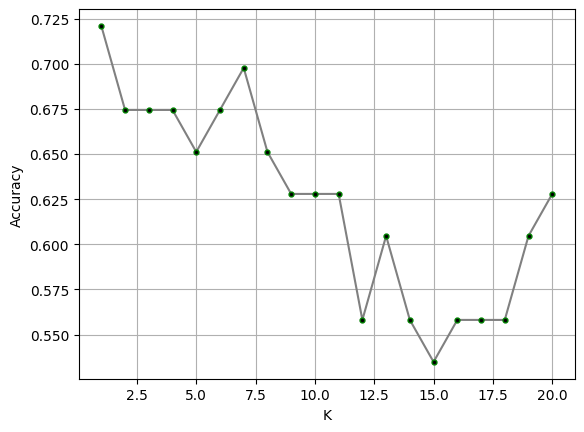

In [98]:
plt.plot(K_value,accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

### Pros:

1. Simple and easy to implement

2. this is effective for the low-dimesion dataset(less number of features)

3. in this knn we dont have the training phrase we only have the testing phase; whenever we add the new so we can add it without the training(lazy lerner)

### Cons:
    
1. not suitable for the large dataset

2. it is not sutaible for the higher dimension since there is no training process everything we are doing on a distance

4. not sutaible for the imbalnced data

5. it is not sutaible for the outlier

6. it is not sutabile for the large scaled or data without scaling